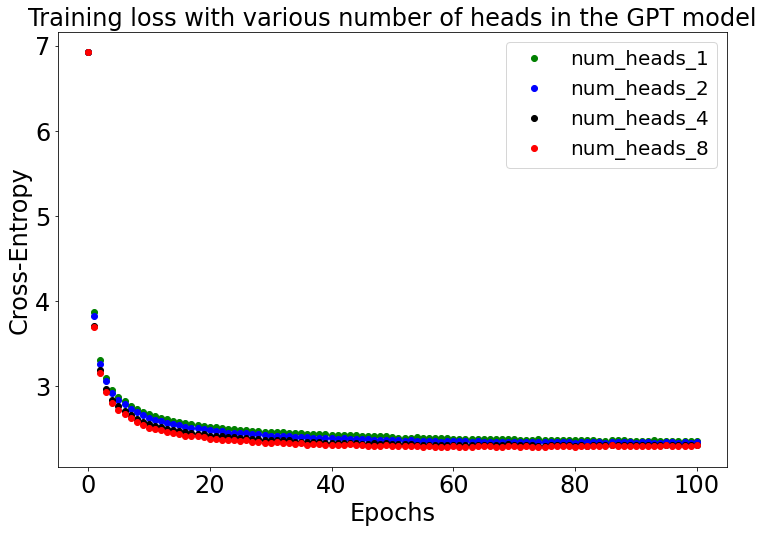

In [1]:
import matplotlib.pyplot as plt
import datetime
import numpy as np



train_loss_6M_head_1 = np.load("6M_number_heads_1val_loss_values.npy")
train_loss_6M_head_2 = np.load("6M_number_heads_2_val_loss_values.npy")
train_loss_6M_head_4 = np.load("6M_16bit_batchsize16_val_loss_values.npy")
train_loss_6M_head_8 = np.load("head_8_val_loss_values.npy")

plt.figure(figsize=(12, 8))  
plt.plot(train_loss_6M_head_1 , 'go', label='num_heads_1')
plt.plot(train_loss_6M_head_2, 'bo', label='num_heads_2')
plt.plot(train_loss_6M_head_4 , 'ko', label='num_heads_4')
plt.plot(train_loss_6M_head_8, 'ro', label='num_heads_8')

plt.xlabel('Epochs',fontsize=24)
plt.ylabel('Cross-Entropy',fontsize=24)
plt.title('Training loss with various number of heads in the GPT model',fontsize=24)
plt.legend(fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=24)
plt.show()

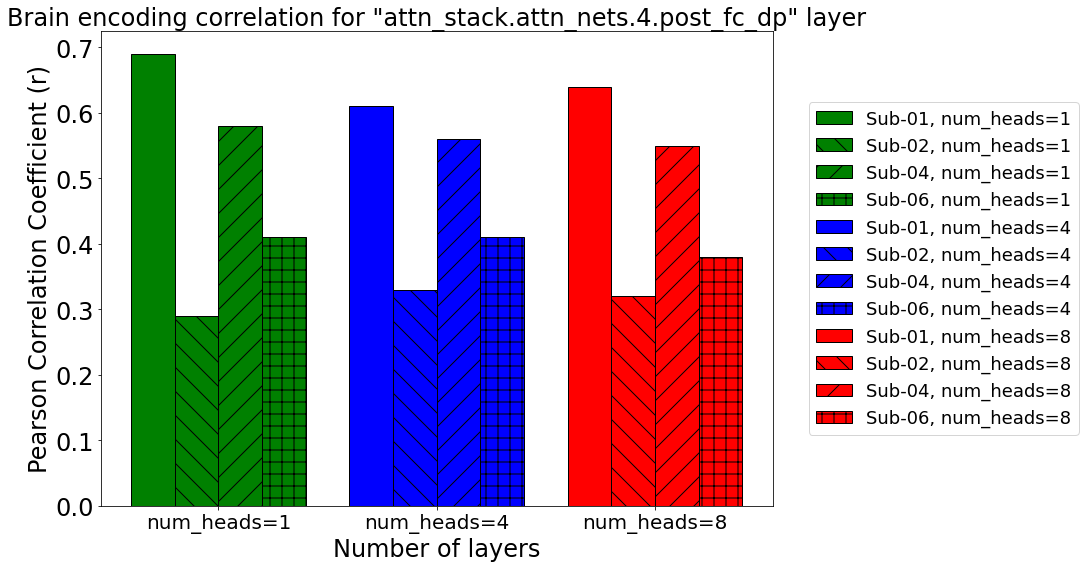

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Data
sub1_r = [0.69, 0.61, 0.64 ]
sub2_r = [0.29,0.33 ,0.32 ]
sub4_r = [0.58, 0.56 ,0.55 ]
sub6_r = [0.41,0.41 ,0.38  ]

colors = {'num_heads=1': 'g', 'num_heads=4': 'b', 'num_heads=8': 'r'}

datasets = ['num_heads=1', 'num_heads=4', 'num_heads=8']

bar_width = 0.2

# Plot
plt.figure(figsize=(15, 8))

# Create an empty set to track labels to avoid duplicates
labels_done = set()

for i, dataset in enumerate(datasets):
    # Sub1
    plt.bar(i - 1.5 * bar_width, sub1_r[i], color=colors[dataset], width=bar_width, edgecolor='black',
            label=f'Sub-01, {dataset}' if f'Sub-01, {dataset}' not in labels_done else "")
    labels_done.add(f'Sub-01, {dataset}')
    # Sub2
    plt.bar(i - 0.5 * bar_width, sub2_r[i], color=colors[dataset], width=bar_width, hatch='\\', edgecolor='black',
            label=f'Sub-02, {dataset}' if f'Sub-02, {dataset}' not in labels_done else "")
    labels_done.add(f'Sub-02, {dataset}')
    # Sub4
    plt.bar(i + 0.5 * bar_width, sub4_r[i] if i < len(sub4_r) else 0, color=colors[dataset], hatch='/', width=bar_width, edgecolor='black',
            label=f'Sub-04, {dataset}' if f'Sub-04, {dataset}' not in labels_done else "")
    labels_done.add(f'Sub-04, {dataset}')
    # Sub6
    plt.bar(i + 1.5 * bar_width, sub6_r[i] if i < len(sub6_r) else 0, color=colors[dataset], hatch='+', width=bar_width, edgecolor='black',
            label=f'Sub-06, {dataset}' if f'Sub-06, {dataset}' not in labels_done else "")
    labels_done.add(f'Sub-06, {dataset}')

# X-ticks and labels
plt.xticks(np.arange(len(datasets)), datasets, fontsize=20)
plt.yticks(fontsize=24)
plt.xlabel('Number of layers', fontsize=24)
plt.ylabel('Pearson Correlation Coefficient (r)', fontsize=24)
plt.title('Brain encoding correlation for "attn_stack.attn_nets.4.post_fc_dp" layer', fontsize=24)

# Legend
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", fontsize=18)

plt.tight_layout()
plt.show()
